<a href="https://colab.research.google.com/github/warff1604/algorithms/blob/main/Coursework_ML_ver_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Прогнозирование оттока клиентов в телекоммуникационной компании**
Предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты.

Необходимо проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят).

### **Структура данных**
<br>
`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [250]:
# импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

# загрузка данных
!wget -O telecom_users.csv -q https://www.dropbox.com/s/6rv3n91bavwm8f5/telecom_users.csv?dl=0

telecom_users_df = pd.read_csv('telecom_users.csv')
telecom_users_df[:5]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


Повторяющихся записей нет

In [251]:
# столбцы 'Unnamed: 0' и 'customerID' не несут смысловой информации - удаляем их
telecom_users_df = telecom_users_df.drop(columns=['Unnamed: 0', 'customerID'])
telecom_users_df[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [252]:
# проверим данные на наличие повторяющихся записей
telecom_users_df.duplicated().sum()

16

In [253]:
telecom_users_df.loc[telecom_users_df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1689,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes
2170,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,19.65,No
2592,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.2,No
2946,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.9,Yes
3368,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
3377,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
3471,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.30,20.3,No
3570,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
3951,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.90,20.9,Yes
4355,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.2,Yes


In [254]:
# удаление повторяющися записей
telecom_users_df = telecom_users_df.drop_duplicates(keep='first')

In [255]:
# выводим информацию о telecom_users_df, включая тип и столбцы индекса, ненулевые значения
telecom_users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5970 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5970 non-null   object 
 1   SeniorCitizen     5970 non-null   int64  
 2   Partner           5970 non-null   object 
 3   Dependents        5970 non-null   object 
 4   tenure            5970 non-null   int64  
 5   PhoneService      5970 non-null   object 
 6   MultipleLines     5970 non-null   object 
 7   InternetService   5970 non-null   object 
 8   OnlineSecurity    5970 non-null   object 
 9   OnlineBackup      5970 non-null   object 
 10  DeviceProtection  5970 non-null   object 
 11  TechSupport       5970 non-null   object 
 12  StreamingTV       5970 non-null   object 
 13  StreamingMovies   5970 non-null   object 
 14  Contract          5970 non-null   object 
 15  PaperlessBilling  5970 non-null   object 
 16  PaymentMethod     5970 non-null   object 


Заметим, что столбец 'TotalCharges' отмечен как строковый, хотя по легенде - это "общая сумма, которую клиент заплатил за услуги за все время", т.е. подразумевается тип float

In [256]:
# произведем преобразование тип данных в 'TotalCharges', в случае ошибки преобразования записываем NaN
telecom_users_df['TotalCharges'] = pd.to_numeric(telecom_users_df['TotalCharges'], errors='coerce')

In [257]:
# снова выводим информацию о telecom_users_df, включая тип и столбцы индекса, ненулевые значения
telecom_users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5970 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5970 non-null   object 
 1   SeniorCitizen     5970 non-null   int64  
 2   Partner           5970 non-null   object 
 3   Dependents        5970 non-null   object 
 4   tenure            5970 non-null   int64  
 5   PhoneService      5970 non-null   object 
 6   MultipleLines     5970 non-null   object 
 7   InternetService   5970 non-null   object 
 8   OnlineSecurity    5970 non-null   object 
 9   OnlineBackup      5970 non-null   object 
 10  DeviceProtection  5970 non-null   object 
 11  TechSupport       5970 non-null   object 
 12  StreamingTV       5970 non-null   object 
 13  StreamingMovies   5970 non-null   object 
 14  Contract          5970 non-null   object 
 15  PaperlessBilling  5970 non-null   object 
 16  PaymentMethod     5970 non-null   object 


In [258]:
# выделяем численные данные, замечаем, что у нас появились значения NaN - заменяем их на среднее значение
numeric_data = telecom_users_df.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()

data_df = telecom_users_df.fillna(numeric_data_mean)

In [259]:
# Просмотр статистических данных telecom_users, где значения столбцов - числовые данные
numeric_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5970.000000,5970.000000,5970.000000,5960.000000
mean,0.161642,32.553099,64.871926,2304.125772
std,0.368152,24.494958,30.102688,2274.158543
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,412.012500
50%,0.000000,29.000000,70.450000,1416.025000
75%,0.000000,56.000000,89.937500,3852.775000
max,1.000000,72.000000,118.750000,8684.800000


In [260]:
# выделяем строковые данные, заполняем пустые значения, если такие имеются
categorical = list(telecom_users_df.dtypes[telecom_users_df.dtypes == 'object'].index)
telecom_users_df[categorical] = telecom_users_df[categorical].fillna('NotGiven')
telecom_users_df[categorical] = telecom_users_df[categorical].fillna('NotGiven')

In [261]:
# Просмотр статистических данных telecom_users, где значения столбцов - строковые данные
telecom_users_df[categorical].describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5970,5970,5970,5970,5970,5970,5970,5970,5970,5970,5970,5970,5970,5970,5970,5970
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3040,3066,4179,5380,2832,2622,2975,2598,2633,2953,2382,2349,3253,3520,2001,4393


Проведем разведочный анализ данных

In [262]:
binary_labels = {'gender': ['Мужчина', 'Женщина'],
                 'Partner': ['Состоит в браке', 'Не состоит в браке'],
                 'SeniorCitizen': ['Не пенсионер', 'Пенсионер'],
                 'Dependents': ['Нет иждивенцев', 'Есть иждивенцы'],
                 'PhoneService': ['Да', 'Нет'],
                 'PaperlessBilling': ['Да', 'Нет'],
                 'Churn': ['Нет', 'Да']}

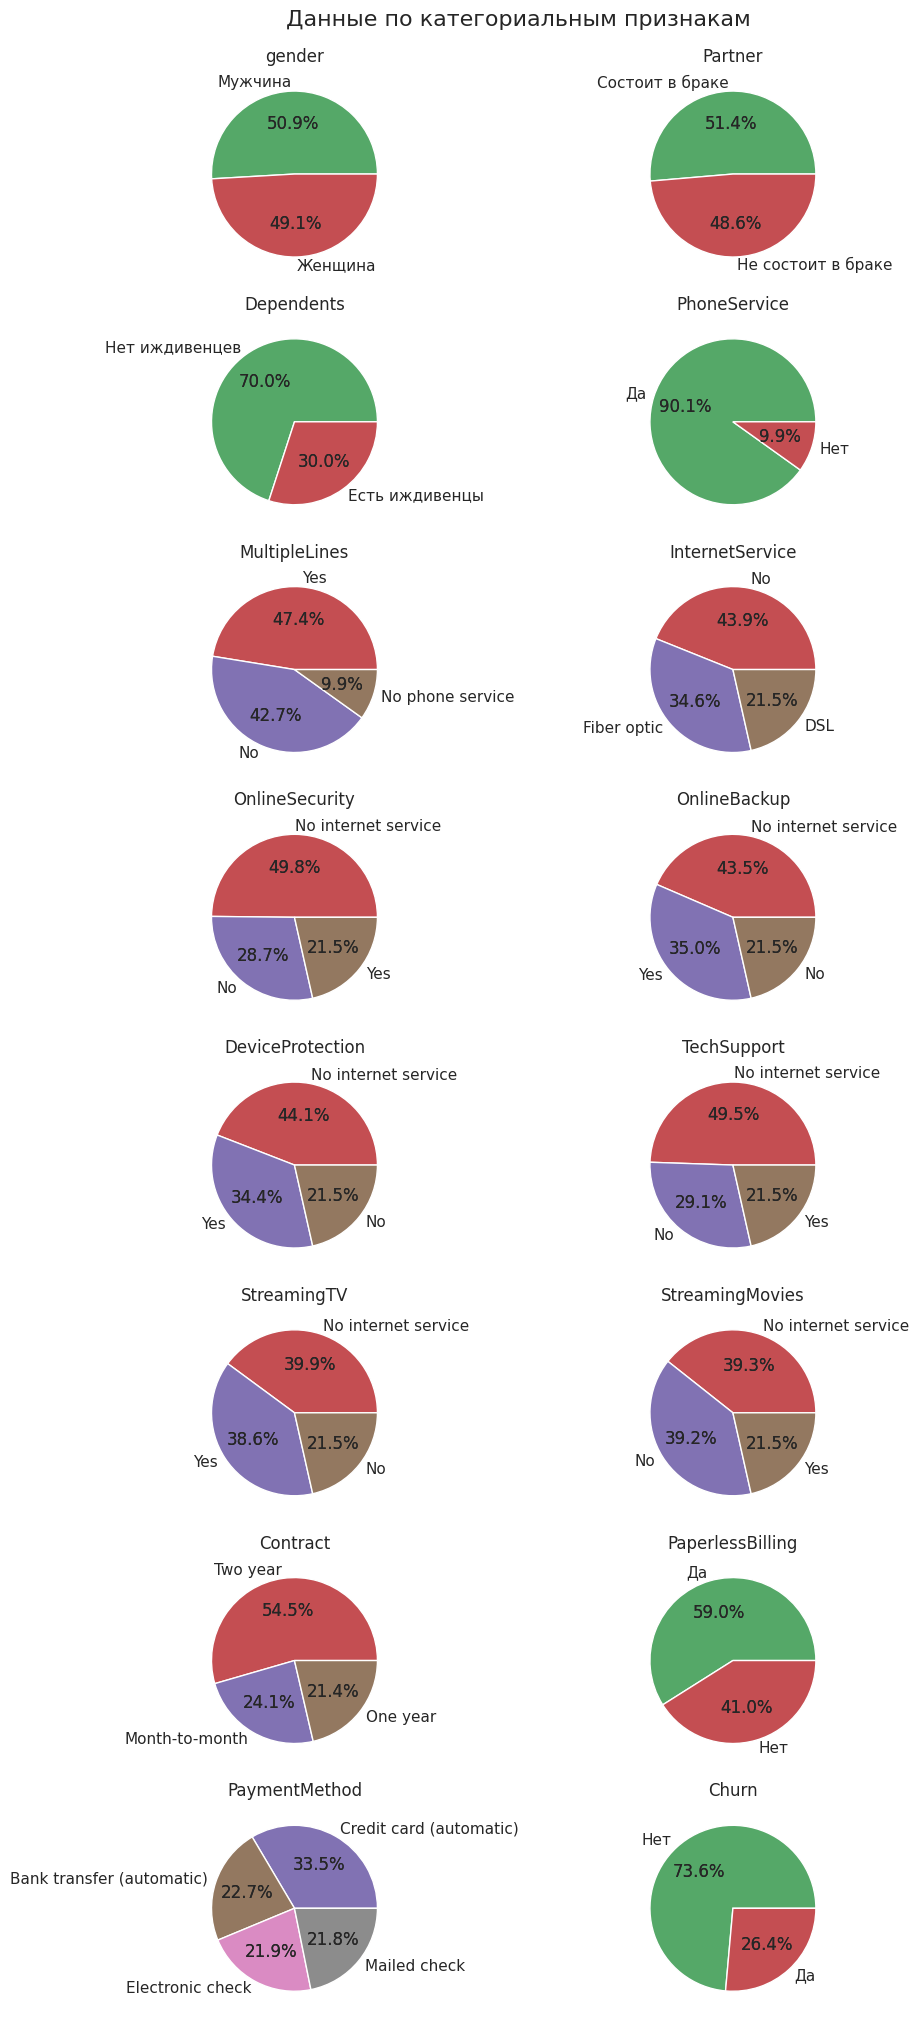

In [263]:
# Инициализация области изображения графиков
fig, axes = plt.subplots(nrows=len(categorical) // 2 , ncols=2, figsize=(10, 20))

for cat, ax in zip(categorical, axes.flat):
    if telecom_users_df[cat].nunique() > 2:
        ax.pie(x=telecom_users_df[cat].value_counts(), labels=telecom_users_df[cat].unique(), autopct='%1.1f%%')
    else:
        ax.pie(x=telecom_users_df[cat].value_counts(), labels=binary_labels[cat], autopct='%1.1f%%')

    ax.pie(x=telecom_users_df[cat].value_counts(), autopct='%1.1f%%')
    ax.set_title(f'{cat}')

# Автоматически подбираем параметры отображения так, чтобы различные элементы не пересекались.
fig.tight_layout()

# Отображение заголовка
plt.suptitle('Данные по категориальным признакам', x=0.55, y=1.01, fontsize=16)

# Отображение графика
plt.show()

Построим распределение, показывающее, как долго и сколько клиентов пользовались услугами

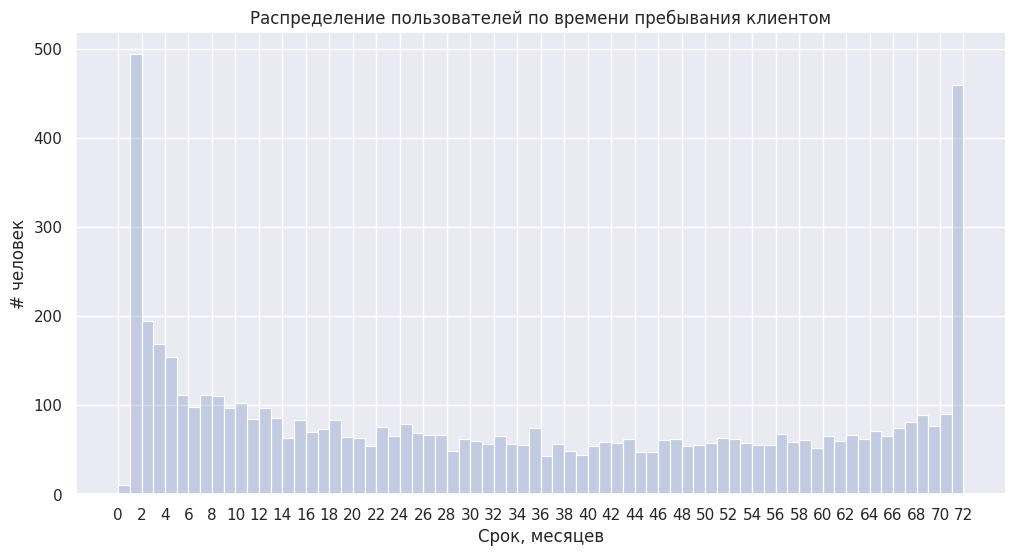

In [264]:
# Инициализация области изображения графиков
fig, ax = plt.subplots(figsize=(12, 6))

# Определяем число столбцов
bins = telecom_users_df['tenure'].max() - telecom_users_df['tenure'].min()

# Вывод графика
sns.histplot(data=telecom_users_df, x='tenure', ax=ax, alpha=0.25, bins=bins)

# Вывод заголовка графика и названия осей
ax.set_title('Распределение пользователей по времени пребывания клиентом')
ax.set_xticks(list(range(telecom_users_df['tenure'].min(), telecom_users_df['tenure'].max() + 1, 2)))
ax.set_xlabel('Срок, месяцев')
ax.set_ylabel('# человек')

# Отображение графика
plt.show()

По результатам изучения данных датасета `telecom_users` заключаем следующее:


*   Среди клиентов компании мужчин и женщин примерно поровну: 51 % мужчин и 49 % женщин
*   Среди клиентов 51,5 % состоят в браке и 48,5 % - не состоят, т.е. тоже примерно поровну
*   Пенсионеры составляют 16,1 % клиентов, т.е. большая часть - работающие люди непенсионного возраста.
*   70,1 % клиентов не имеют иждивенцев(детей)
*   Большинство клиентов пользуются телефонной связью
*   В основном клиенты не пользуются дополнительными услугами
*   Основной тип контракта клиентов - `Month-to-month`(ежемесячный платеж)
*   Основной способ оплаты - `Electronic check`
*   Можно отметить, что большой отток клиентов происходит сразу же после первого месяца в компании
*   Общий процент оттока клиентов составляет 26,5 %.

# 2. Исследование зависимостей и формулирование гипотез

###Исследуем связь категориальных признаков с целевым признаком `Churn`

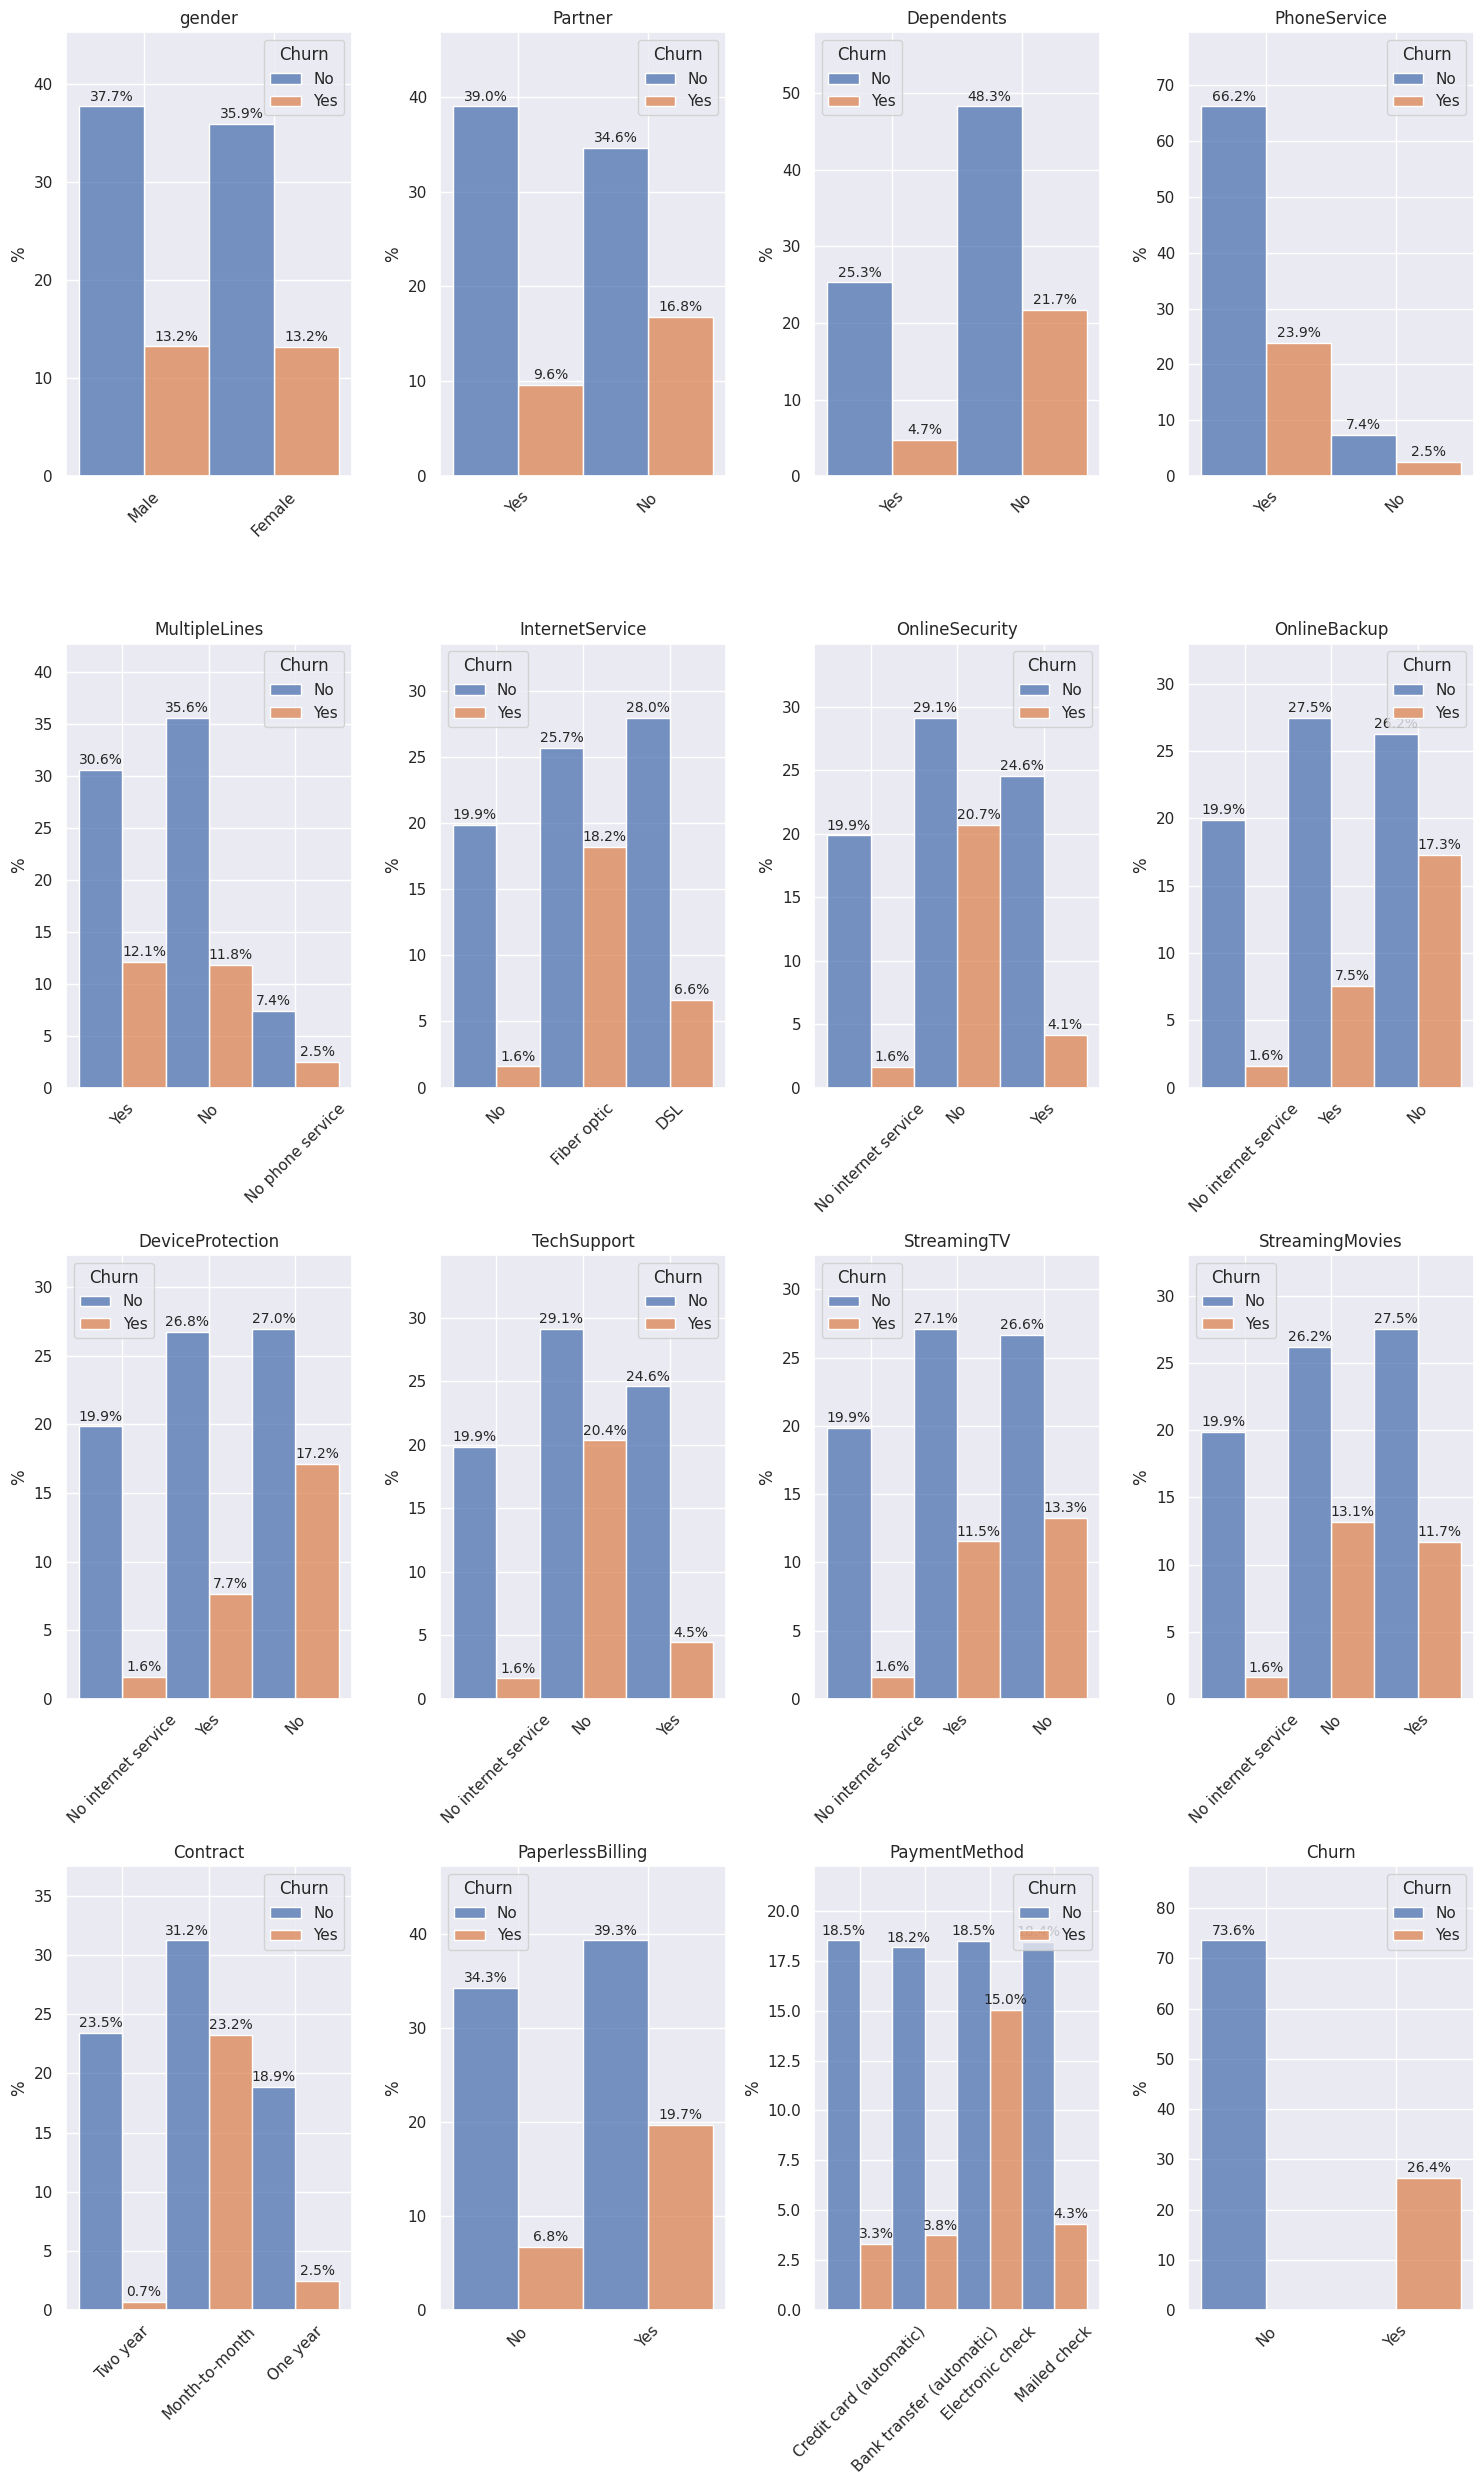

In [265]:
# Инициализация области изображения графиков
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 25))

for cat, ax in zip(categorical, axes.flat):
    sns.histplot(data=telecom_users_df, x=cat, hue='Churn', ax=ax, multiple='dodge', stat='percent')

    # Вывод названия осей
    ax.set_title(f'{cat}')
    ax.set_ylabel('%')
    ax.set_xlabel(None)
    ax.tick_params(axis='x', rotation=45)
    for container in ax.containers :
        labels = [f'{w:0.1f}%' if (w := v.get_height()) > 0 else '' for v in container]
        ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, rotation=0, padding=2)

    ax.margins(y=0.2)

# Автоматически подбираем параметры отображения так, чтобы различные элементы не пересекались.
fig.tight_layout()

# Отображение графика
plt.show()

Из визуализации заключаем, что признаки `gender`, `Partner`, `MultipleLines`, `StreamingTV`, `StreamingMovies` слабо связаны с целевой переменной `Churn`.

Клиенты, которые скорее всего уйдут:<br>
* Контракт на месяц `Month-to-month`(отток 23,4%)
* Нет иждивенцев(отток 21,8%)
* Не подключена услуга `OnlineSecurity`(отток 20,7%)
* Не подключена услуга `Tech Support`(отток 20,4%)
* Клиент пользуется бумажным биллингом `PaperlessBilling`(отток 19,7%)
* Подключение клиента `InternetService`- `Fiber Optic`(отток 18,2%)

### Исследуем связь количественных признаков с целевой переменной `Churn`

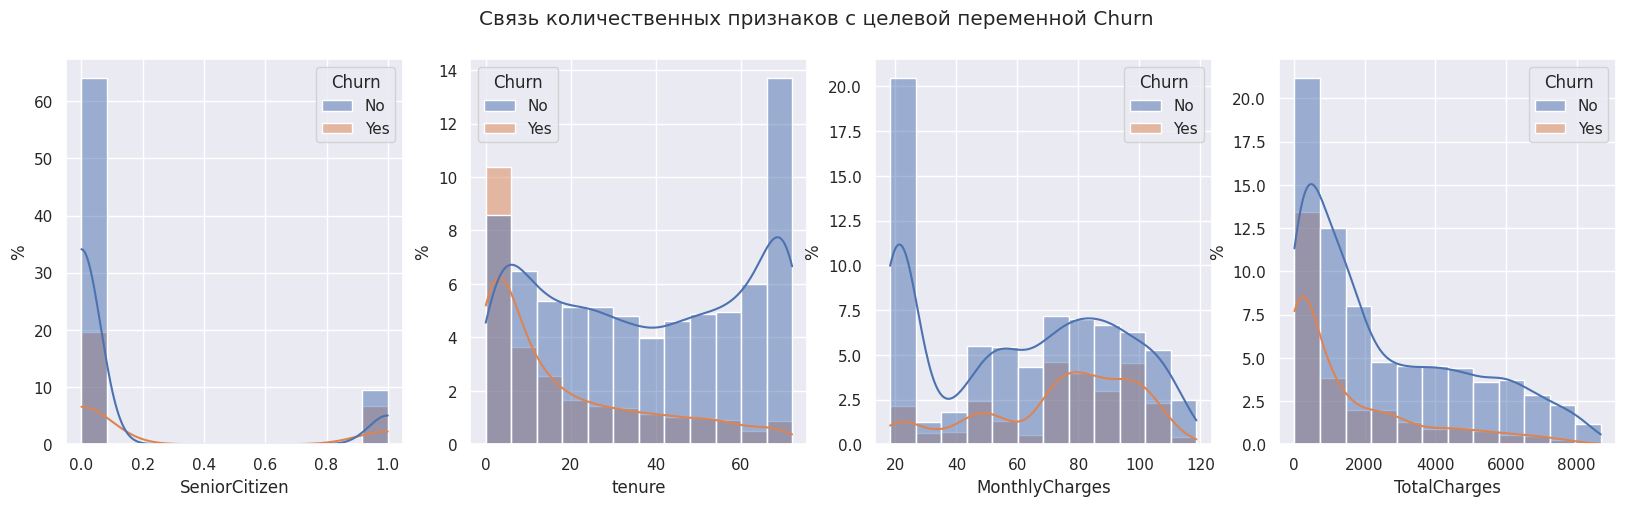

In [266]:
# Инициализация области изображения графиков
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_data.columns), figsize=(20, 5))

telecom_users_df['tenure'].max()

# вывод титула
fig.suptitle('Связь количественных признаков с целевой переменной Churn')

for item, ax in zip(numeric_data.columns, axes.flat):
    sns.histplot(telecom_users_df[['Churn', item]], x=item, hue='Churn', ax=ax, stat='percent', bins=12, kde=True)
    ax.set_ylabel('%')

# Отображение графика
plt.show()

Из визуализации можно сделать вывод о зависимости между признаками `tenure`, `TotalCharges` и `Churn` - с увеличением значений `tenure` и `TotalCharges` происходит уменьшение оттока клиентов.
Клиент с низкими ежемесячными платежами скорее останется в компании и наоборот,- клиенты с низкой общей суммой за услуги, скорее всего уйдет.


### Для проведения оценки степени линейной зависимости признаков построим матрицу корреляции Пирсона.

Проведем преобразование категориальных признаков.<br>
Для признаков с двумя уникальными значениями применим `Label encoder`<br>
Для признаков, у которых более двух уникальных значений - `One-hot encoder`

In [267]:
# Разделение категориальных признаков для дальнейшего кодирования
binary = []
multi = []
for col in categorical:
    if data_df[col].nunique() == 2:
      binary.append(col)
    else:
      multi.append(col)

In [268]:
# кодирование признаков из binary(два уникальных значения) с помощью Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
telecom_users_df_enc = telecom_users_df.copy()

for col in binary:
    telecom_users_df_enc[col] = le.fit_transform(telecom_users_df_enc[col])

telecom_users_df_enc[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),24.10,1734.65,0
1,0,0,0,0,44,1,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,1,Credit card (automatic),88.15,3973.20,0
2,0,1,1,0,38,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,1,0,0,0,4,1,No,DSL,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,55.90,238.50,0
4,1,0,0,0,2,1,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,0,Electronic check,53.45,119.50,0


In [269]:
# кодирование признаков из multi(более двух уникальных значений) с помощью One-hot Encoder
telecom_users_df_enc = pd.get_dummies(telecom_users_df_enc, columns=multi, drop_first = True)
telecom_users_df_enc[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,1,72,1,0,24.10,1734.65,0,...,0,1,0,1,0,0,1,1,0,0
1,0,0,0,0,44,1,1,88.15,3973.20,0,...,0,0,1,0,0,0,0,1,0,0
2,0,1,1,0,38,1,1,74.95,2869.85,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,4,1,1,55.90,238.50,0,...,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,2,1,0,53.45,119.50,0,...,0,0,0,0,0,0,0,0,1,0


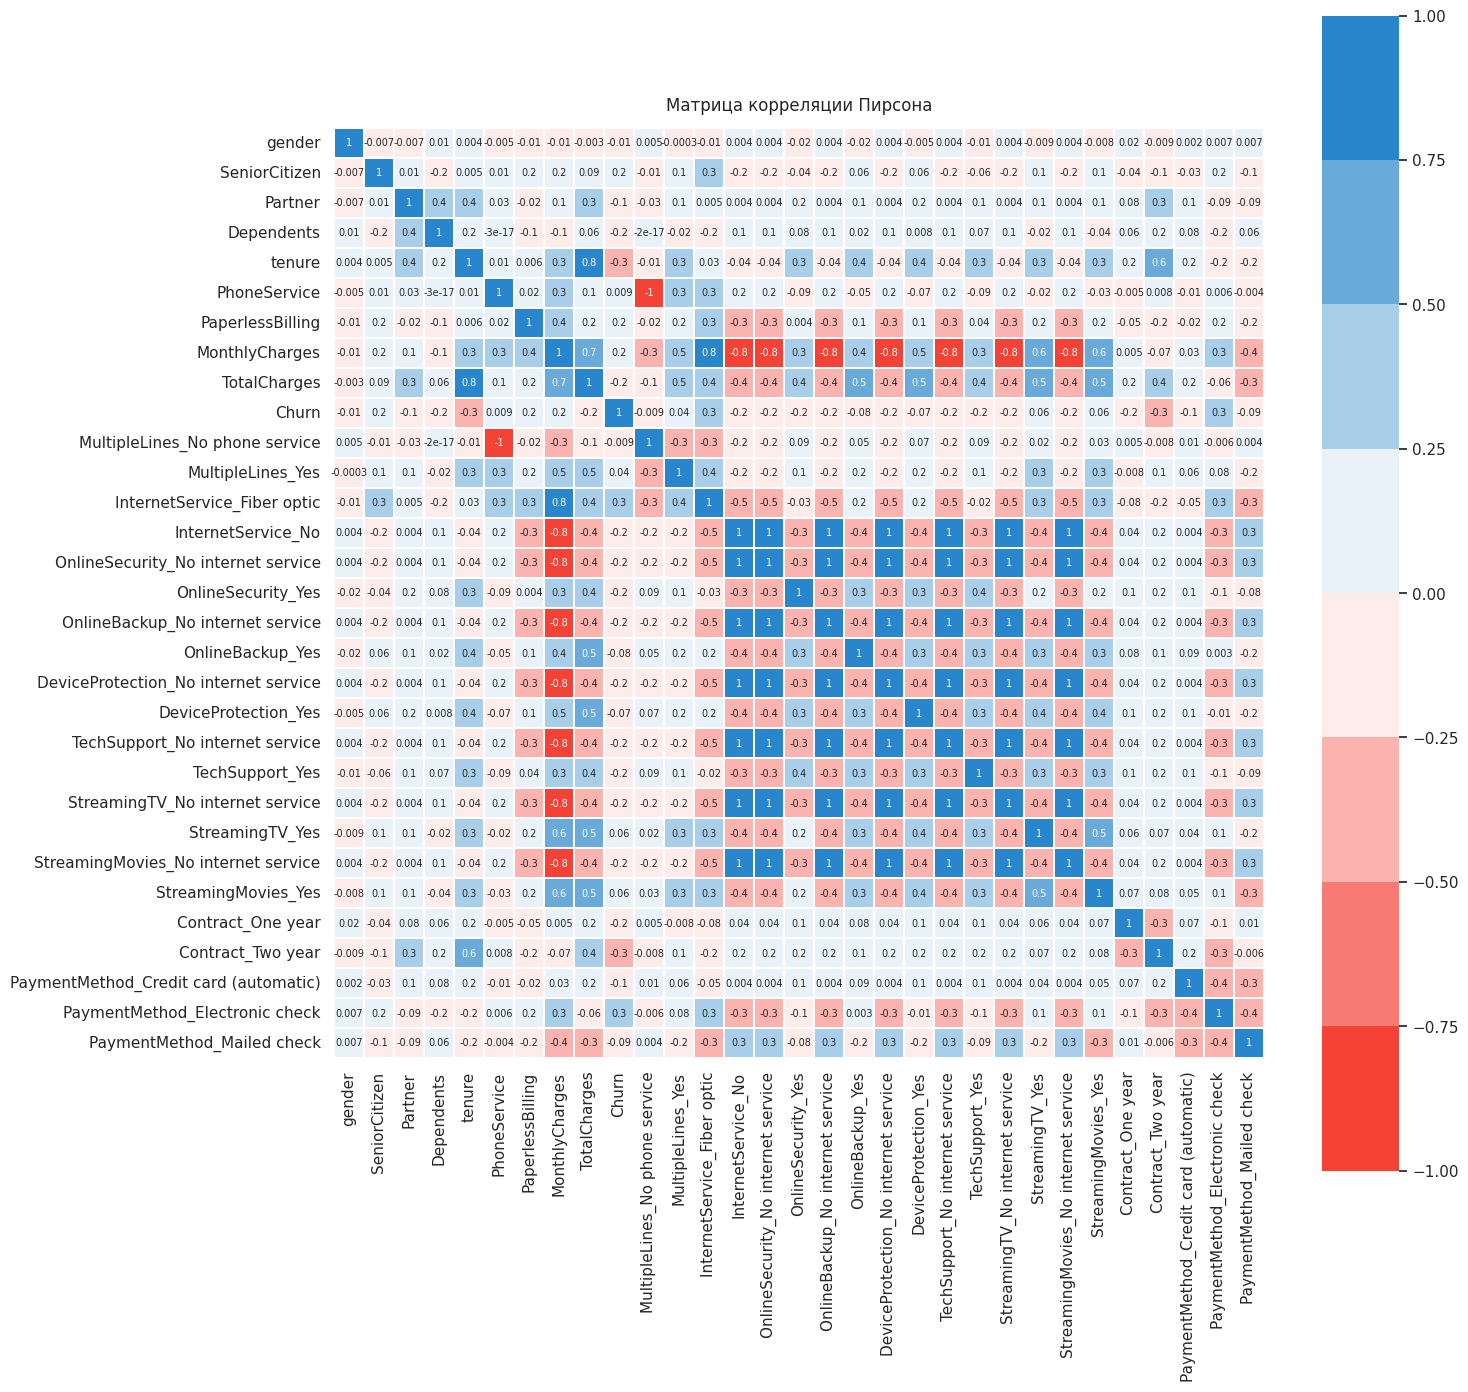

In [270]:
# Создание новой цветовой карты для подсвечивания сильных связей
color_map = sns.color_palette(['#f44336', '#f77b72', '#fab3ae', '#fdecea',
                               '#e9f2f9', '#a9ceea', '#69aadb', '#2986cc'])

# Инициализация области изображения графиков
plt.figure(figsize=(15, 15))

plt.title('Матрица корреляции Пирсона', size=12, y=1.01)
sns.heatmap(telecom_users_df_enc.corr(), cmap=color_map, square=True, vmin=-1,
            vmax=1, center= 0, linewidths=0.1, linecolor='white', annot=True,
            annot_kws={'size': 7}, fmt='.1g',
            cbar_kws=dict(ticks=np.arange(-1.0, 1.1, 0.25), aspect=15))

# Отображение графика
plt.show()

Из анализа матрицы корреляции замечаем избыточность признаков, некоторые признаки полностью дублируют информацию, коэффициент корреляции составляет по модулю 0,8..1.<br>
Видим, что целевая переменная Churn слабо линейно связана с другими признаками<br>
Для удаления избыточных, сильно коррелирующих с другими, признаков определим вспомогательную функцию. В качестве порога, определяющего силу линейной корреляции, зададим значение 0,7.


In [271]:
# определение функции для удаления избыточных признаков
def findCorrelation(df, cutoff=0.7):
    drop_list = []
    for i in range(len(df.columns)):
        for j in range(i + 1, len(df.columns)):
            if abs(df.corr()[df.columns[i]][df.columns[j]]) >= cutoff:
                drop_list.append(df.columns[j])
    drop_list = list(set(drop_list))
    df = df.drop(columns=drop_list)
    return df

In [272]:
# получаем данные без избыточных признаков
cleaned_df = findCorrelation(telecom_users_df_enc)
cleaned_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_Yes,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,1,72,1,0,24.10,0,1,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,44,1,1,88.15,0,0,...,1,1,0,1,0,0,0,1,0,0
2,0,1,1,0,38,1,1,74.95,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,4,1,1,55.90,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,2,1,0,53.45,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,1,1,1,95.00,1,0,...,0,0,0,1,1,0,0,0,1,0
5982,0,0,1,1,23,1,1,91.10,0,1,...,1,1,1,1,1,0,1,1,0,0
5983,1,0,1,1,12,1,1,21.15,0,0,...,0,0,0,0,0,0,0,0,1,0
5984,1,1,0,0,12,1,1,99.45,1,1,...,0,1,0,1,1,0,0,0,1,0


Количество признаков уменьшилось на 10.

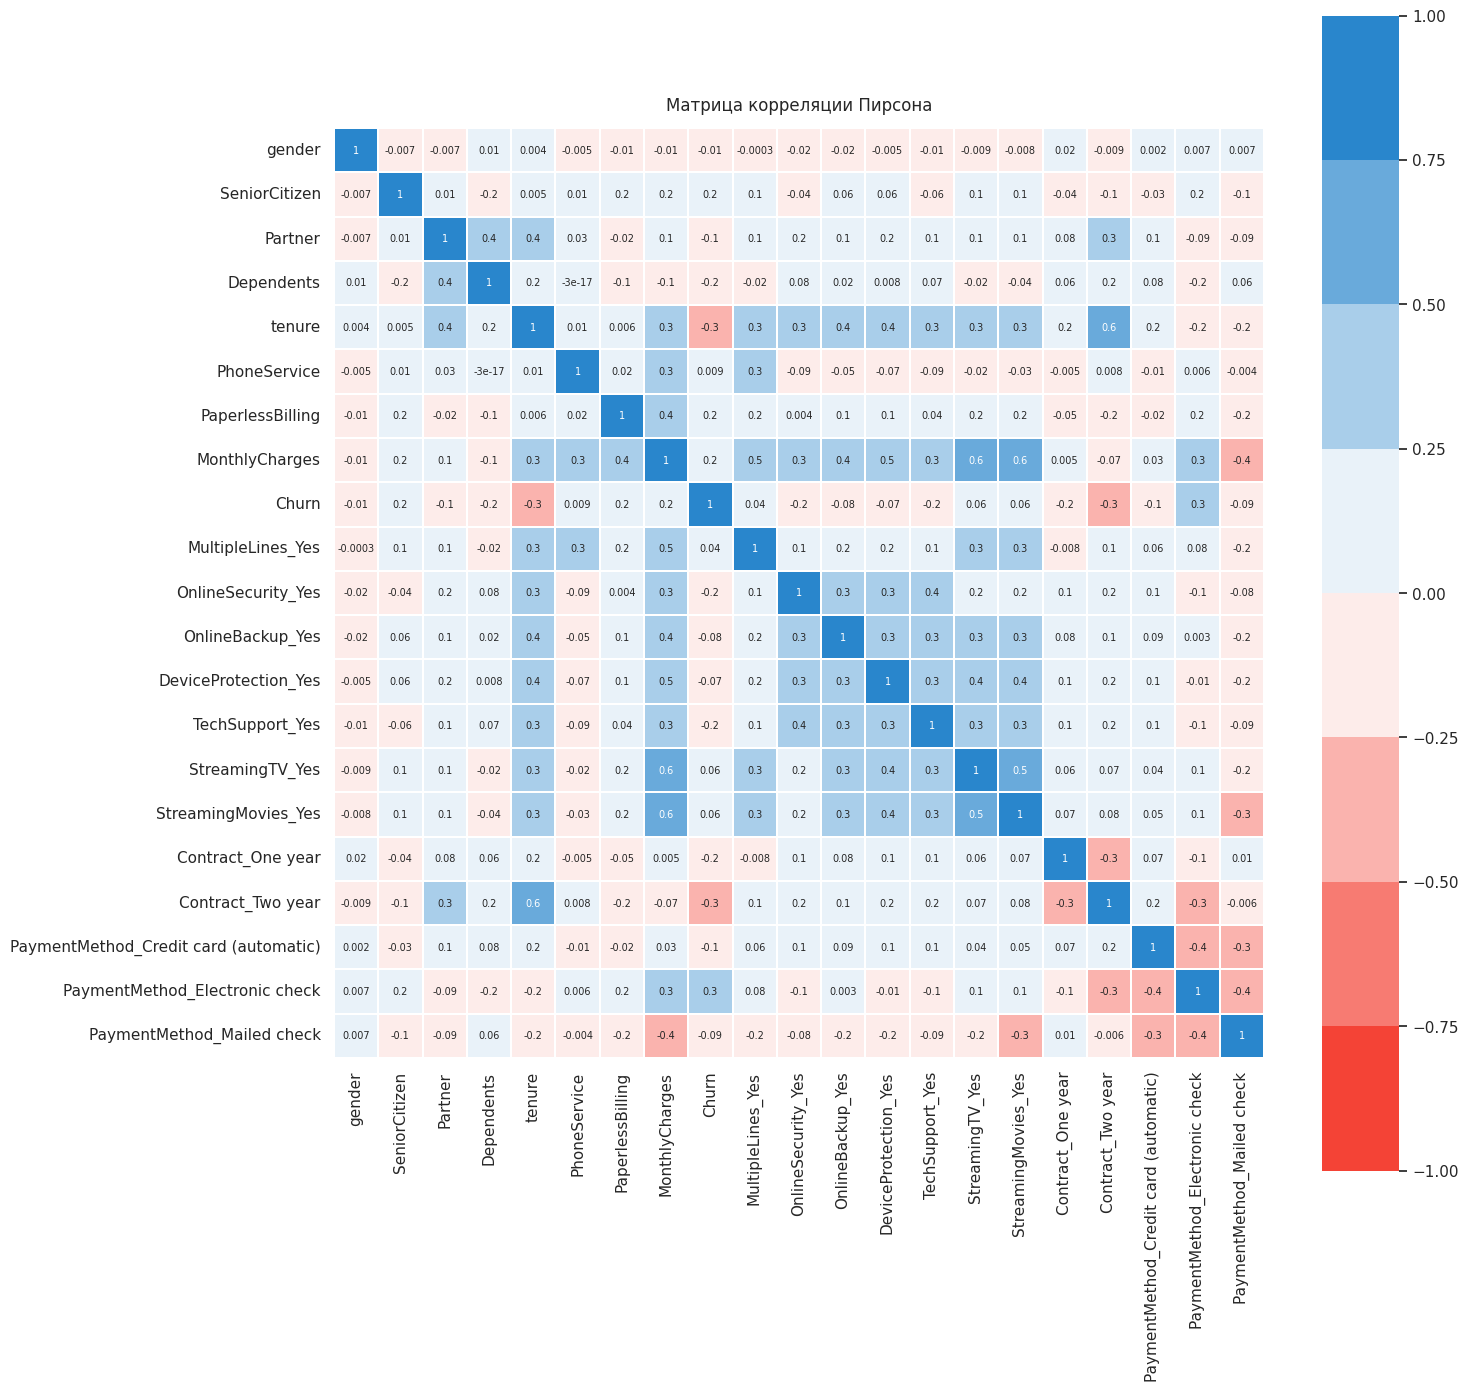

In [273]:
# Создание цветовой карты для подсвечивания сильных связей
color_map = sns.color_palette(['#f44336', '#f77b72', '#fab3ae', '#fdecea', '#e9f2f9', '#a9ceea', '#69aadb', '#2986cc'])

# Инициализация области изображения графиков
plt.figure(figsize=(15, 15))

plt.title('Матрица корреляции Пирсона', size=12, y=1.01)
sns.heatmap(cleaned_df.corr(), cmap=color_map, square=True, vmin=-1,
            vmax=1, center= 0, linewidths=0.1, linecolor='white', annot=True,
            annot_kws={'size': 7}, fmt='.1g',
            cbar_kws=dict(ticks=np.arange(-1.0, 1.1, 0.25), aspect=15))

# Отображение графика
plt.show()

Из приведенной выше визуализации заключаем, что существует не так много признаков, коррелирующих друг с другом. Это хорошо с точки зрения включения этих признаков в модель обучения, потому что означает, что в нашем обучающем наборе не так много избыточных данных, и каждый признак несет уникальную информацию.

In [274]:
# ранжирование признаков по силе линейной зависимости с целевой переменной `Churn`
corr_list = [(col, cleaned_df.corr()['Churn'][col]) for col in cleaned_df.corr().columns if (abs(cleaned_df.corr()['Churn'][col]) >= 0.15) & (col != 'Churn')]

sorted(corr_list, key=lambda x: abs(x[1]))

[('SeniorCitizen', 0.15077748973891722),
 ('Dependents', -0.15926533857868286),
 ('TechSupport_Yes', -0.16091530948139643),
 ('OnlineSecurity_Yes', -0.17344387885284632),
 ('Contract_One year', -0.17521937170340615),
 ('MonthlyCharges', 0.1880222915045609),
 ('PaperlessBilling', 0.18859459789855326),
 ('PaymentMethod_Electronic check', 0.29652819302852584),
 ('Contract_Two year', -0.30155832179991415),
 ('tenure', -0.347298191725703)]

### Выводы
* В данных не отмечено каких-либо аномалий и выбросов
*  Набор данных относительно целевой переменной `Churn` несбалансирован(73.6% клиентов ушли против 26.4% - остались). Источником несбалансированности
не является наличие дубликатов, данные несбалансированы по своей природе - количество ушедших клиентов просто меньше, чем остающихся.
*  Наиболее сильная линейная зависимость `Churn` проявляется с признаками `tenure`, `Contract_Two year`, `PaymentMethod_Electronic check`, `PaperlessBilling`, `MonthlyCharges`
*  Были удалены избыточные, сильно коррелирующие с другими, признаки. В качестве порога, определяющего силу линейной корреляции, задано значение 0,7.

# 3. Построение моделей для прогнозирования оттока

Перед нами стоит задача бинарной классификации - необходимо определить, уйдет ли клиент в ближайшее время или нет. Для достижения целей данной задачи я предлагаю использовать ряд базовых алгоритмов классификации, чтобы определить самый подходящий.

После определения лучшего алгоритма классификации проведем настройку гиперпараметров для оптимизации модели и оценим работу финальной модели на тестовой выборке данных.

Как мы выяснили, у нас присутствует некоторый дисбаланс классов, метрика accuracy нас не устраивает - слепое угадывание "Not-Churn" может выдать показатель `accuracy` в 73,6%.<br>
При оценке задачи в контексте бизнес-модели, нам важно не упустить клиентов, готовых уйти, при этом, возможно, включив в их число оставшихся клиентов, неверно классифицировав их как ложно положительные ответы.
Таким образом, нам важно минимизировать количество ложно отрицательных ответов алгоритма. Этим требованиям отвечает критерий качества `recall`(полнота).<br>
Однако прогнозирование всех примеров как положительных приведет к большому числу ложно положительных примеров, и `precision`(точность) будет очень низкой.
Поскольку f1-мера учитывает и точность, и полноту, то для бинарной классификации несбалансированных данных она может быть лучшей метрикой.<br>
Для оценки моделей мы будем использовать метрику f1(f1-score).<br>

In [275]:
# импорт необходимого модуля
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

# константа RANDOM_STATE для воспроизводимости результатов
RANDOM_STATE = 10

# разделение датасета на признаки и целевую переменную
y = cleaned_df['Churn']
X = cleaned_df.drop(columns=['Churn'])

# Разделим выборку на тренировочную и тестовую части.
# Поскольку выборка несбалансирована, будем использовать стратификацию по y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)

Проверим, в каком диапазоне находятся значения признаков, и в случае большого различия проведем их масштабирование c помощью StandardScaler.

In [276]:
# функция для визуализации разброса значений признаков
def show_scales(features, scales):
    sns.barplot(y=features, x=scales, ax=ax)
    ax.set_xlabel('Scale')
    plt.tight_layout()

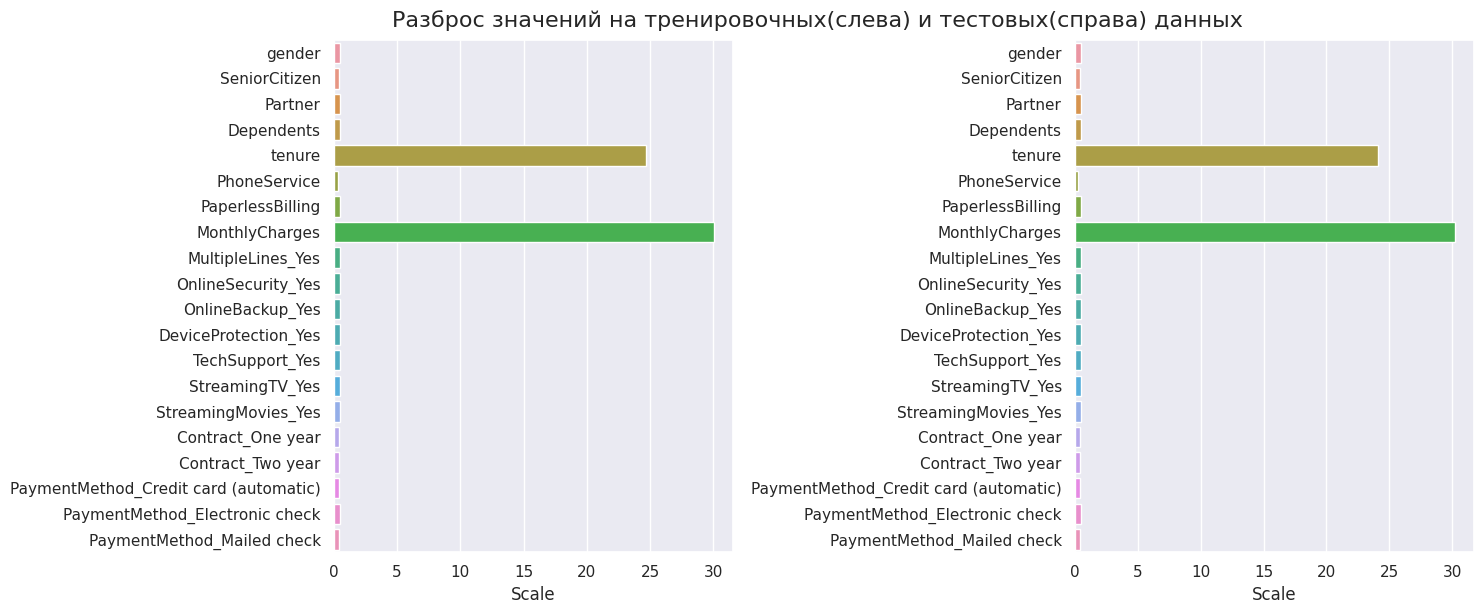

In [277]:
# визуализации разброса значений признаков
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
X_list = [X_train, X_test]

for i, ax in enumerate(axes.flat):
      show_scales(X.columns, X_list[i].std())

# Отображение заголовка
plt.suptitle('Разброс значений на тренировочных(слева) и тестовых(справа) данных', x=0.55, y=1.02, fontsize=16)

plt.show()

In [278]:
# масштабирование признаков
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

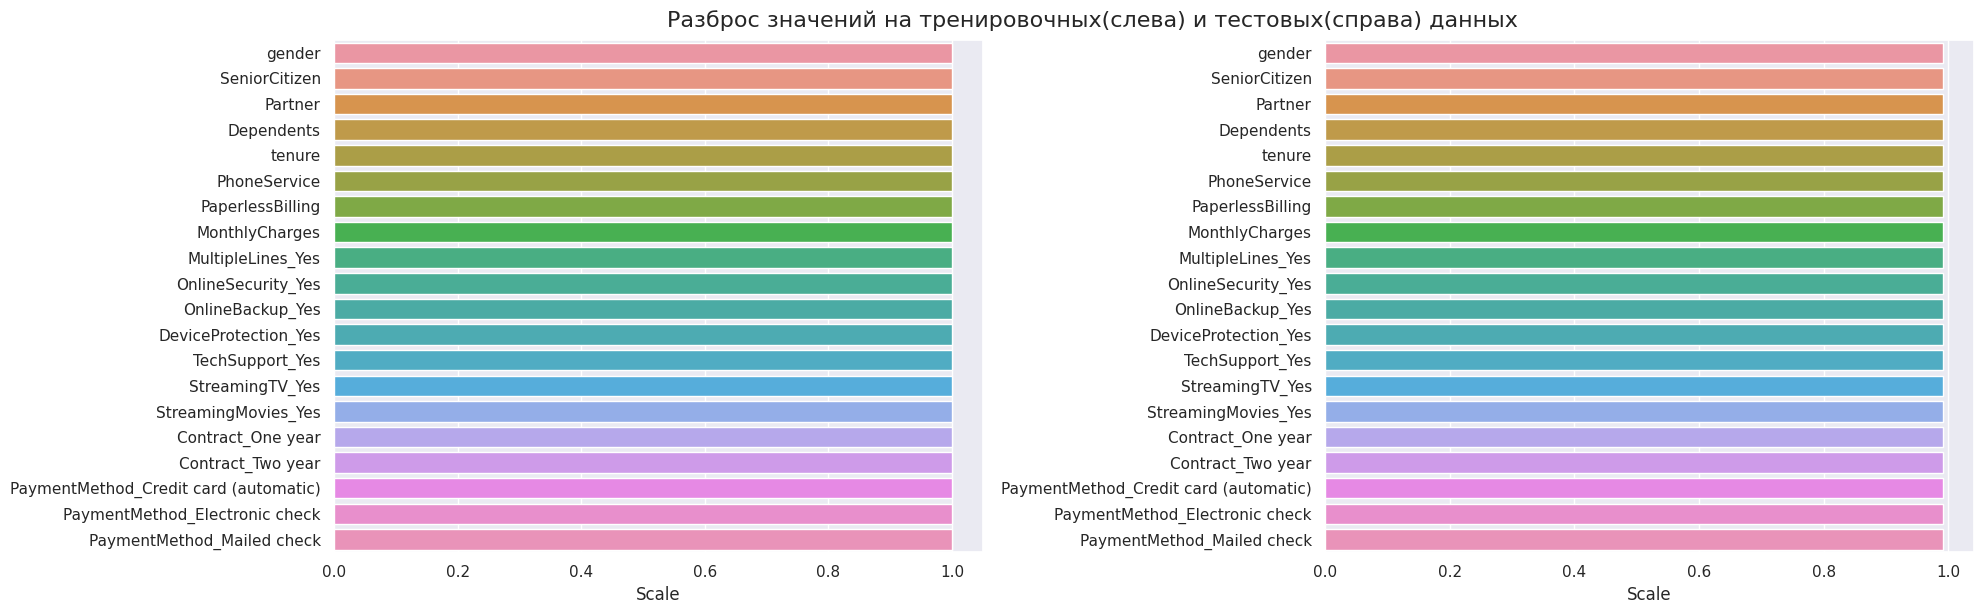

In [279]:
# визуализации разброса значений признаков
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

X_list = [X_train_scaled, X_test_scaled]

for i, ax in enumerate(axes.flat):
      scales = pd.Series(data=X_list[i].std(), index=X.columns)
      show_scales(X.columns, scales)

# Отображение заголовка
plt.suptitle('Разброс значений на тренировочных(слева) и тестовых(справа) данных', x=0.55, y=1.02, fontsize=16)

plt.show()

In [280]:
# импорт библиотек моделей машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [281]:
# в нашем случае соотношение классов составляет 3:1, поэтому при разбиении
# на фолды будем применять стратификацию: каждый фолд содержит примерно такое же соотношение классов, как и всё исходное множество
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

В качестве отправной точки используем несколько базовых моделей классификаторов:
*   К-ближайших соседей
*   Логистическая регрессия
*   Наивный Байесовский классификатор
*   Метод опорных векторов
*   Случайный лес
*   Градиентный бустинг

In [282]:
# базовые модели
models = [KNeighborsClassifier(), LogisticRegression(), GaussianNB(), SVC(random_state=RANDOM_STATE), RandomForestClassifier(random_state=RANDOM_STATE), XGBClassifier(random_state=RANDOM_STATE)]

# метрики качества моделей
scores_list = ['precision', 'recall', 'f1']
scores_dict = {'precision': precision_score, 'recall': recall_score, 'f1': f1_score}

In [283]:
# импорт модуля
from sklearn.model_selection import cross_val_score

# получение значений метрик precision, recall, f1 моделей путем перекрестной проверки
scores = [[cross_val_score(model, X_train_scaled, y_train, scoring=score, cv=skf).mean() for score in scores_list] for model in models]

In [284]:
# вывод метрик качества базовых моделей
pd.DataFrame(data=scores, columns=scores_list, index=[model.__class__.__name__ for model in models]).sort_values(by=['f1'], ascending=False)

,precision,recall,f1
GaussianNB,0.512305,0.743657,0.606537
LogisticRegression,0.642691,0.534397,0.583489
XGBClassifier,0.610798,0.508165,0.554121
SVC,0.652302,0.477347,0.551235
RandomForestClassifier,0.618874,0.457445,0.525569
KNeighborsClassifier,0.518661,0.471929,0.494033


Из полученных результатов видно, что лучший результат показал Наивный Байесовский классификатор с показателем f1-score=0.606537.<br>
Далее произведем более точную настройку гиперпараметров для оптимизации модели через сеточный поиск с оценкой по метрике f1-score.

In [285]:
# импорт модуля
from sklearn.model_selection import GridSearchCV

gaussian_nb_params = {
            'priors': [None, [0.1,]* len(y_train),],
            'var_smoothing': np.logspace(0, -9, num=100),
         }
gaussian_nb_grid = GridSearchCV(GaussianNB(), param_grid=gaussian_nb_params, n_jobs=-1, cv=skf, scoring='f1')
gaussian_nb_grid.fit(X_train_scaled, y_train)

print(f'Лучшее значение f1-меры по сетке: {round(gaussian_nb_grid.best_score_, 3)}')
print(f'Лучшие параметры: {gaussian_nb_grid.best_params_}\n')

Лучшее значение f1-меры по сетке: 0.608
Лучшие параметры: {'priors': None, 'var_smoothing': 0.1}



Настроенный Наивный Байесовский классификатор показал результат немного лучше, чем классификатор с параметрами по умолчанию.

Далее проверим, улучшит ли стекинг показатели f1-меры. Для этого выберем для стекинга 4 лучших алгоритма из предыдущего сравнения.

In [286]:
# импорт модуля
from sklearn.model_selection import cross_val_predict

# список базовых моделей
models = [GaussianNB(), LogisticRegression(), SVC(random_state=RANDOM_STATE), RandomForestClassifier(random_state=RANDOM_STATE)]

# Определение алгоритма мета-модели
meta = XGBClassifier(random_state=RANDOM_STATE)

# Получение матрицы мета-признаков на основе тренировочных данных
meta_mtrx = np.empty((X_train_scaled.shape[0], len(models)))
for i, model in enumerate(models):
    meta_mtrx[:, i] = cross_val_predict(model, X_train_scaled, y_train, cv=skf)

# Получение матрицы мета-признаков на основе тестовых данных
meta_mtrx_test = np.empty((X_test_scaled.shape[0], len(models)))
for n, alg in enumerate(models):
    meta_mtrx_test[:, n] = alg.fit(X_train_scaled, y_train).predict(X_test_scaled)

params = {'n_estimators': [10],
          'learning_rate': [0.9],
          'min_child_weight': [5],
          'subsample': [0.1]}

# params = {'n_estimators': np.arange(10, 100, 10),
#           'learning_rate': np.arange(0.1, 1.0, 0.2),
#            'min_child_weight': np.arange(1, 10, 2),
#            'subsample': np.arange(0.1, 1.0, 0.2)}


# Поиск оптимальных параметров мета-модели
meta_model = GridSearchCV(meta, params, cv=skf, scoring='f1').fit(meta_mtrx, y_train)

# Вывод метрики качества модели
print(f'f1-score: {round(meta_model.best_score_, 3)}')
print(f'Лучшие параметры: {meta_model.best_params_}\n')

f1-score: 0.591
Лучшие параметры: {'learning_rate': 0.9, 'min_child_weight': 5, 'n_estimators': 10, 'subsample': 0.1}



В ходе построения моделей прогнозирования оттока клиентов были определены 3 модели, показавшие самые высокие значения `f1-score`:
*  Наивный Байесовский классификатор, `f1-score` = 0.608
*  Стекинг, `f1-score` = 0.591
*  Логистическая регрессия, `f1-score` = 0.584

# 4. Сравнение качества моделей

Сначала сравним качество выбранных моделей по выбранным метрикам на тестовых данных.

In [287]:
# получаем прогноз моделей на тестовых данных
lr_model = LogisticRegression().fit(X_train_scaled, y_train)
lr_predict = lr_model.predict(X_test_scaled)
gnb_predict = gaussian_nb_grid.best_estimator_.predict(X_test_scaled)
meta_predict = meta_model.best_estimator_.predict(meta_mtrx_test)

# расчет метрик качества моделей
scores = [[scores_dict[score](y_test, y_pred) for score in scores_list] for y_pred in [gnb_predict, meta_predict, lr_predict]]

In [288]:
# вывод метрик качества моделей
pd.DataFrame(data=scores, columns=scores_list, index=['GaussianNB', 'Stacking', 'LogisticRegression']).sort_values(by=['f1'], ascending=False)



,precision,recall,f1
GaussianNB,0.504213,0.758985,0.605907
Stacking,0.631961,0.551797,0.589165
LogisticRegression,0.645995,0.528541,0.581395


Описание результатов классификации с помощью матрицы ошибок

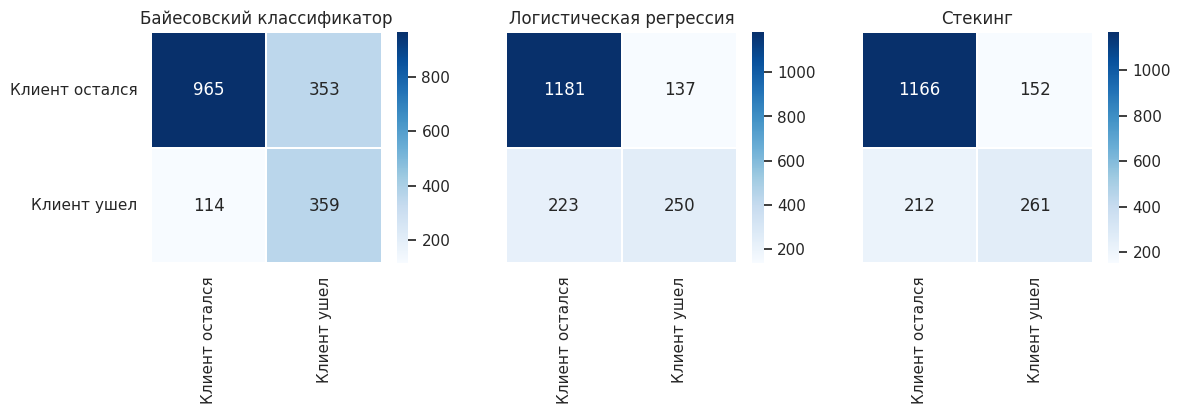

In [289]:
# Определение размера диаграмм
fig, axes = plt.subplots(1, 3, figsize=(13, 3), sharey=True)

# Список целевых переменных предсказанных моделями
y_predicts = [gnb_predict, lr_predict, meta_predict]

# Список наименований моделей
model_names = ['Байесовский классификатор', 'Логистическая регрессия', 'Стекинг']

# Вывод матриц ошибок
for ax, y_predict, name in zip(axes.flat, y_predicts, model_names):
    sns.heatmap(
        confusion_matrix(y_test, y_predict), cmap='Blues', square=True,
        linewidths=0.1, linecolor='white', annot=True, fmt='d',
        xticklabels=['Клиент остался', 'Клиент ушел'],
        yticklabels=['Клиент остался', 'Клиент ушел'],
        ax=ax
    ).set_title(name)

# Вывод диаграмм
plt.show()

Из результатов сравнения моделей видно, что Наивный байесовский классификатор превосходит остальные алгоритмы по показателю полноты(Recall). При 473 фактических случаях ухода клиентов, 359 оказались правильными. По показателю точности(Precision) на первом месте - Логистическая регрессия. При 387 спрогнозированных случаях оттока, 250 - правильные.

### Оценка степени достоверности результатов

При выполнении классификации часто требуется не только предсказать метку класса, но и получить вероятность соответствующей метки. Эта вероятность дает вам некоторую уверенность в предсказании. Предсказание вероятности ухода позволит понять, к какому из клиентов следует обратиться в первую очередь, а к кому - в последнюю.<br>

Однако, не всегда выходные данные метода pred_proba классификатора могут быть напрямую интерпретированы как уровень достоверности. Для этого классификатор должен классифицировать образцы таким образом, чтобы среди образцов, для которых он дал значение pred_proba, например, близкое к 0,8, примерно 80% фактически принадлежали к положительному классу.<br>
Классификатор должен быть откалиброван.<br> Оценим наши модели по степени достоверности результатов.

Для оценки, насколько хорошо откалиброван классификатор используем калибровочные кривые.<br>
Калибровочные кривые, также называемые диаграммами надежности, сравнивают, насколько хорошо откалиброваны вероятностные предсказания бинарного классификатора. Он строит частоту положительной метки(точнее, оценку условной вероятности события) по оси Y по сравнению с прогнозируемой вероятностью Predict_proba модели по оси X.

In [290]:
# импорт необходимых модулей
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.metrics import brier_score_loss

In [291]:
clf_list = [(lr_model, 'Logistic Regression', X_test_scaled),
            (gaussian_nb_grid.best_estimator_, 'Naive Bayes', X_test_scaled),
            (meta_model.best_estimator_, 'Stacking', meta_mtrx_test)]

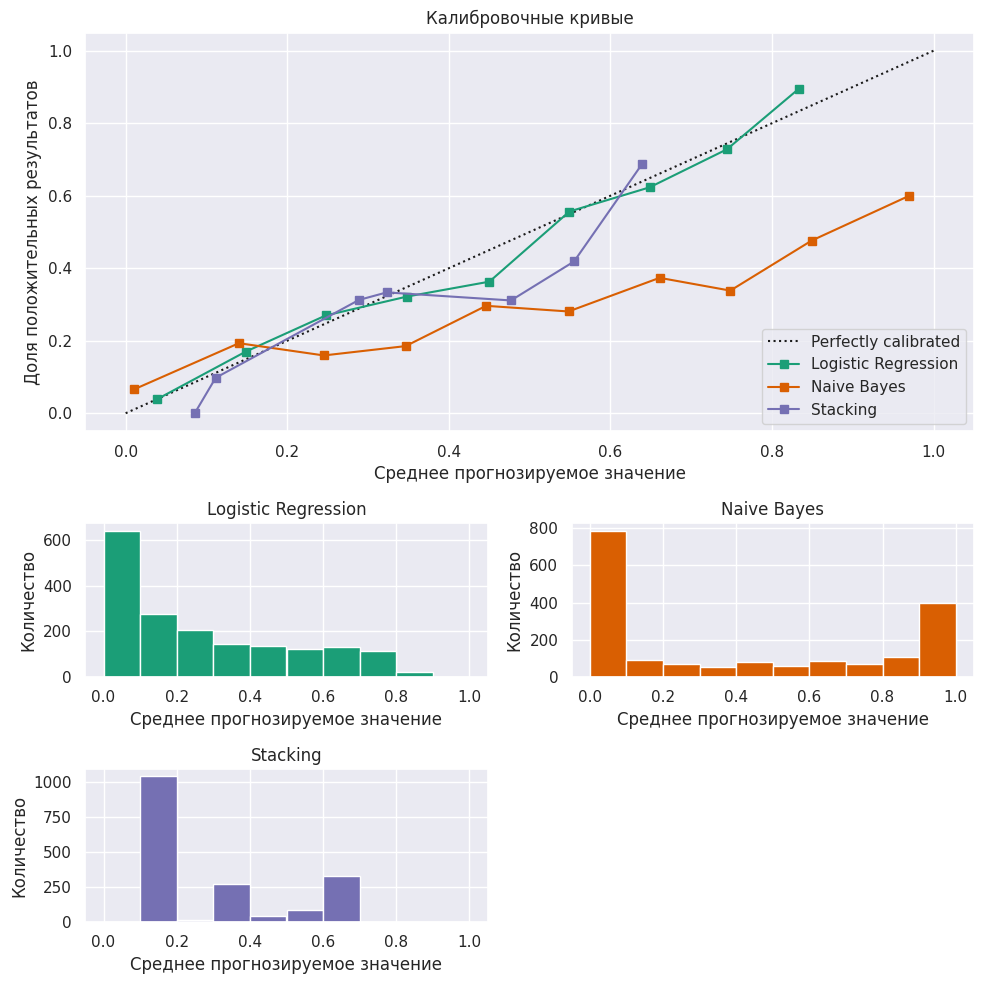

In [292]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(nrows=4, ncols=2)
colors = plt.get_cmap('Dark2')

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name, X_test) in enumerate(clf_list):
    display = CalibrationDisplay.from_estimator(clf,
                                                X_test,
                                                y_test,
                                                n_bins=10,
                                                name=name,
                                                ax=ax_calibration_curve,
                                                color=colors(i)
                                                )
    calibration_displays[name] = display

ax_calibration_curve.set_xlabel('Среднее прогнозируемое значение')
ax_calibration_curve.set_ylabel('Доля положительных результатов')
ax_calibration_curve.set_title('Калибровочные кривые')

#
grid_positions = [(2, 0), (2, 1), (3, 0)]
for i, (_, name, _) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(calibration_displays[name].y_prob,
            range=(0, 1),
            bins=10,
            label=name,
            color=colors(i))
    ax.set(title=name, xlabel='Среднее прогнозируемое значение', ylabel='Количество')

plt.tight_layout()
plt.show()

LogisticRegression возвращает хорошо откалиброванные прогнозы - калибровочная кривая близка к биссектриссе угла<br>
Наивный байесовский классификатор систематически завышает предсказанную вероятность.

In [293]:
clf_list = [(lr_model, 'Logistic Regression', X_test_scaled),
            (gaussian_nb_grid.best_estimator_, 'Naive Bayes', X_test_scaled),
            (meta_model.best_estimator_, 'Stacking', meta_mtrx_test)]

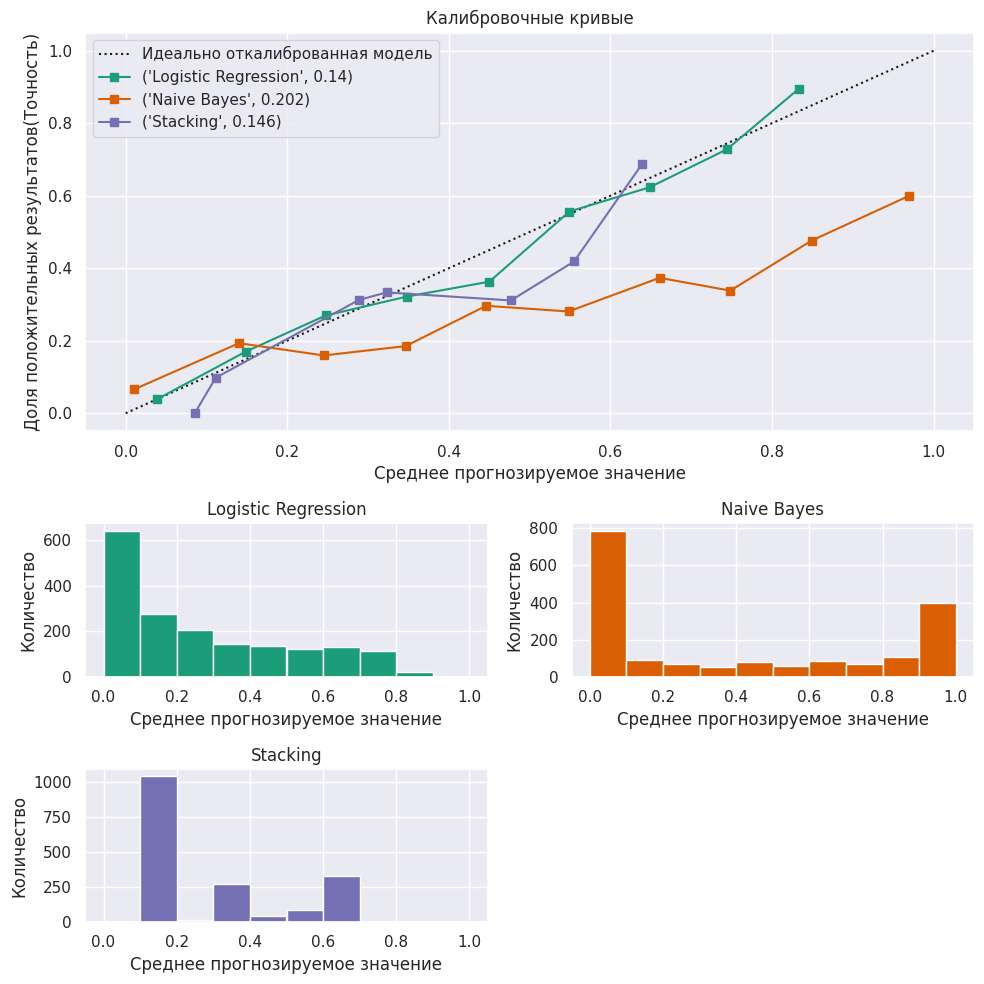

In [294]:
from matplotlib.gridspec import GridSpec
from sklearn.metrics import brier_score_loss

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(nrows=4, ncols=2)
colors = plt.get_cmap('Dark2')

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
grid_positions = [(2, 0), (2, 1), (3, 0)]
ax_calibration_curve.plot([0, 1], [0, 1], 'k:', label='Идеально откалиброванная модель')

for i, (clf, name, X_test) in enumerate(clf_list):
    if hasattr(clf, 'predict_proba'):
            prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    y_pred = clf.predict(X_test)
    clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())

    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
    ax_calibration_curve.plot(mean_predicted_value, fraction_of_positives, 's-', label=f'{name, round(clf_score, 3)}', color=colors(i))

    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(prob_pos,
            range=(0, 1),
            bins=10,
            label=name,
            color=colors(i))
    ax.set(title=name, xlabel='Среднее прогнозируемое значение', ylabel='Количество')
ax_calibration_curve.set(title='Калибровочные кривые', xlabel='Среднее прогнозируемое значение', ylabel='Доля положительных результатов(Точность)')
ax_calibration_curve.legend()

plt.tight_layout()
plt.show()

In [295]:
from collections import defaultdict
from sklearn.metrics import brier_score_loss, f1_score, precision_score, recall_score, roc_auc_score

scores = defaultdict(list)
for i, (clf, name, X_test) in enumerate(clf_list):
    if hasattr(clf, 'predict_proba'):
            y_prob = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
            y_prob = clf.decision_function(X_test)
            y_prob = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    y_pred = clf.predict(X_test)
    y_pred = clf.predict(X_test)
    scores['Classifier'].append(name)

    for metric in [brier_score_loss, roc_auc_score]:
        score_name = metric.__name__.replace('_', ' ').replace('score', '')
        scores[score_name].append(metric(y_test, y_prob))

    for metric in [precision_score, recall_score, f1_score]:
        score_name = metric.__name__.replace('_', ' ').replace('score', '')
        scores[score_name].append(metric(y_test, y_pred))

    score_df = pd.DataFrame(scores).set_index('Classifier')
    score_df.round(decimals=3)

score_df

,Brier loss,Roc auc,Precision,Recall,F1
Classifier,,,,,
Logistic Regression,0.140381,0.834493,0.645995,0.528541,0.581395
Naive Bayes,0.201606,0.822137,0.504213,0.758985,0.605907
Stacking,0.146290,0.787289,0.631961,0.551797,0.589165


In [297]:
from sklearn.isotonic import IsotonicRegression
from sklearn.calibration import CalibratedClassifierCV

# Gaussian Naive-Bayes with isotonic calibration
gnb_isotonic = CalibratedClassifierCV(gaussian_nb_grid.best_estimator_, cv=2, method='isotonic', ensemble=False).fit(X_train_scaled, y_train)
pprob_pos_isotonic = gnb_isotonic.predict_proba(X_test_scaled)[:, 1]

# Gaussian Naive-Bayes with sigmoid calibration
gnb_sigmoid = CalibratedClassifierCV(gaussian_nb_grid.best_estimator_, cv=2, method='sigmoid').fit(X_train_scaled, y_train)
prob_pos_sigmoid = gnb_sigmoid.predict_proba(X_test_scaled)[:, 1]


In [298]:
clf_list = [(lr_model, 'Logistic Regression', X_test_scaled),
            (gaussian_nb_grid.best_estimator_, 'Naive Bayes', X_test_scaled),
            (meta_model.best_estimator_, 'Stacking', meta_mtrx_test),
            (gnb_isotonic, 'Naive Bayes + Isotonic', X_test_scaled),
            (gnb_sigmoid, 'Naive Bayes + Sigmoid', X_test_scaled)]

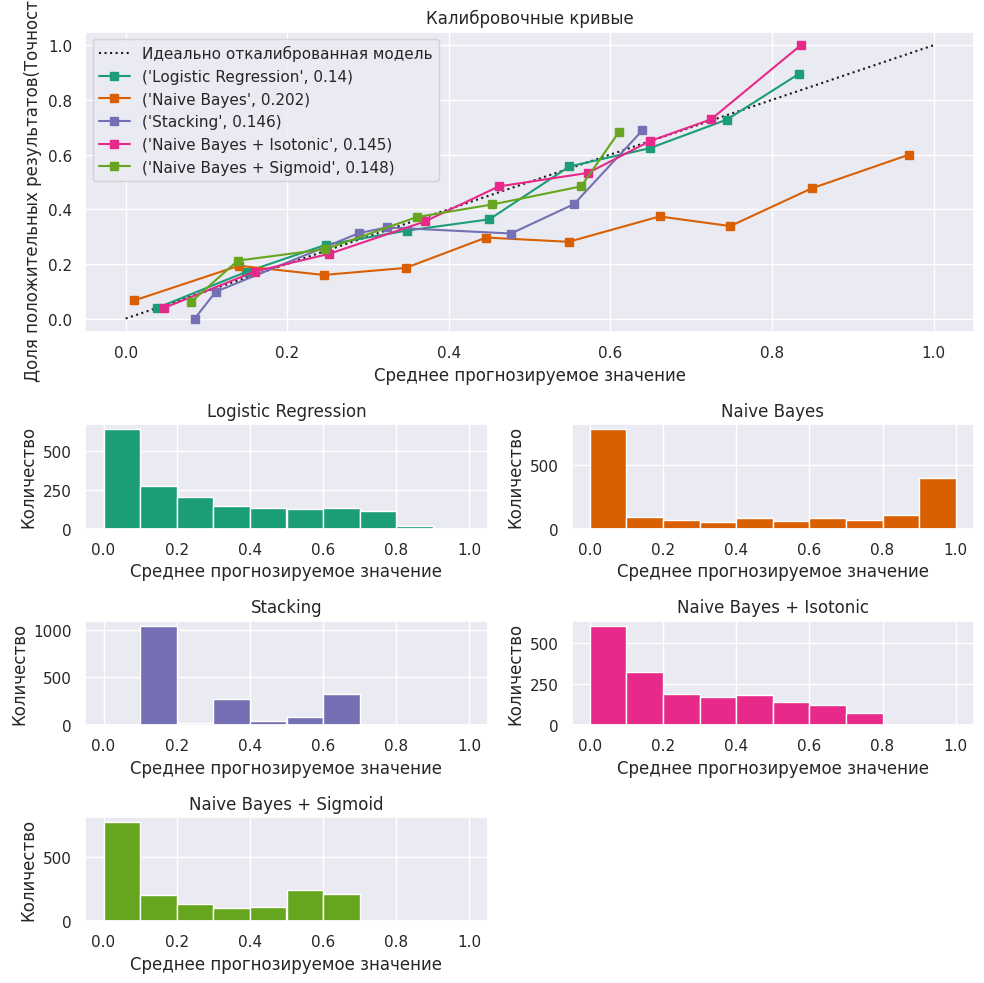

In [299]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(nrows=5, ncols=2)
colors = plt.get_cmap('Dark2')

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1), (4, 0)]
ax_calibration_curve.plot([0, 1], [0, 1], 'k:', label='Идеально откалиброванная модель')

for i, (clf, name, X_test) in enumerate(clf_list):
    if hasattr(clf, 'predict_proba'):
            prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    y_pred = clf.predict(X_test)
    clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())

    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
    ax_calibration_curve.plot(mean_predicted_value, fraction_of_positives, 's-', label=f'{name, round(clf_score, 3)}', color=colors(i))

    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(prob_pos,
            range=(0, 1),
            bins=10,
            label=name,
            color=colors(i))
    ax.set(title=name, xlabel='Среднее прогнозируемое значение', ylabel='Количество')
ax_calibration_curve.set(title='Калибровочные кривые', xlabel='Среднее прогнозируемое значение', ylabel='Доля положительных результатов(Точность)')
ax_calibration_curve.legend()

plt.tight_layout()
plt.show()

In [316]:
from collections import defaultdict
from sklearn.metrics import brier_score_loss, f1_score, precision_score, recall_score, roc_auc_score

scores = defaultdict(list)
for i, (clf, name, X_test) in enumerate(clf_list):
    if hasattr(clf, 'predict_proba'):
            y_prob = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
            y_prob = clf.decision_function(X_test)
            y_prob = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    y_pred = clf.predict(X_test)
    y_pred = clf.predict(X_test)
    scores['Classifier'].append(name)

    for metric in [brier_score_loss, roc_auc_score]:
        score_name = metric.__name__.replace('_', ' ').replace('score', '').strip()
        scores[score_name].append(metric(y_test, y_prob))

    for metric in [precision_score, recall_score, f1_score]:
        score_name = metric.__name__.replace('_', ' ').replace('score', '').strip()
        scores[score_name].append(metric(y_test, y_pred))

    score_df = pd.DataFrame(scores).set_index('Classifier')
    score_df.round(decimals=3)

score_df.sort_values(by=['f1'], ascending=False)
# score_df.columns

,brier loss,roc auc,precision,recall,f1
Classifier,,,,,
Naive Bayes,0.201606,0.822137,0.504213,0.758985,0.605907
Stacking,0.146290,0.787289,0.631961,0.551797,0.589165
Logistic Regression,0.140381,0.834493,0.645995,0.528541,0.581395
Naive Bayes + Sigmoid,0.148404,0.821766,0.576754,0.556025,0.566200
Naive Bayes + Isotonic,0.145346,0.821430,0.618902,0.429175,0.506866
